In [1]:
import matplotlib
%matplotlib inline
from nilearn import datasets
from nilearn import plotting
import nibabel as nib

from neurolang import frontend as fe

destrieux_dataset = datasets.fetch_atlas_destrieux_2009()
destrieux_map = nib.load(destrieux_dataset['maps'])

/Users/dwasserm/sources/NeuroLang/neurolang/expression_pattern_matching.py:55: UserWarning: Warning in class DatalogSolver overwrites {'existential_predicate', 'universal_predicate'} from base GenericSolver[typing.Any]
  warn(warn_message)


In [2]:
destrieux_dataset['labels']

rec.array([(  0, b'Background'), (  1, b'L G_and_S_frontomargin'),
 (  2, b'L G_and_S_occipital_inf'), (  3, b'L G_and_S_paracentral'),
 (  4, b'L G_and_S_subcentral'), (  5, b'L G_and_S_transv_frontopol'),
 (  6, b'L G_and_S_cingul-Ant'), (  7, b'L G_and_S_cingul-Mid-Ant'),
 (  8, b'L G_and_S_cingul-Mid-Post'), (  9, b'L G_cingul-Post-dorsal'),
 ( 10, b'L G_cingul-Post-ventral'), ( 11, b'L G_cuneus'),
 ( 12, b'L G_front_inf-Opercular'), ( 13, b'L G_front_inf-Orbital'),
 ( 14, b'L G_front_inf-Triangul'), ( 15, b'L G_front_middle'),
 ( 16, b'L G_front_sup'), ( 17, b'L G_Ins_lg_and_S_cent_ins'),
 ( 18, b'L G_insular_short'), ( 19, b'L G_occipital_middle'),
 ( 20, b'L G_occipital_sup'), ( 21, b'L G_oc-temp_lat-fusifor'),
 ( 22, b'L G_oc-temp_med-Lingual'), ( 23, b'L G_oc-temp_med-Parahip'),
 ( 24, b'L G_orbital'), ( 25, b'L G_pariet_inf-Angular'),
 ( 26, b'L G_pariet_inf-Supramar'), ( 27, b'L G_parietal_sup'),
 ( 28, b'L G_postcentral'), ( 29, b'L G_precentral'),
 ( 30, b'L G_precuneus'),

In [3]:
nl = fe.RegionFrontend()
for label_number, name in destrieux_dataset['labels']:
    name = name.decode()
    if not name.startswith('L ') or ('S_' not in name and 'Lat_Fis' not in name and 'Pole' not in name) or ('G_' in name) or ('circular' in name):
        continue

    # Create a region object
    region = nl.create_region(destrieux_map, label=label_number)

    # Fine tune the symbol name
    name = 'L_' + name[2:].replace('-', '_')
    nl.add_region(region, result_symbol_name=name)

# Primary sulci


In [9]:
nl.set_type

typing.AbstractSet[neurolang.regions.Region]

In [11]:
nl.types()

{neurolang.regions.ExplicitVBR,
 typing.AbstractSet[neurolang.regions.Region],
 typing.Callable[[neurolang.regions.Region, neurolang.regions.Region], bool],
 typing.Callable[[str], typing.AbstractSet[neurolang.regions.Region]],
 typing.Callable[[typing.AbstractSet, int, typing.AbstractSet, int], typing.AbstractSet[typing.Tuple]],
 typing.Callable[[typing.AbstractSet[neurolang.regions.Region]], neurolang.regions.Region],
 typing.Callable[[typing.Any, typing.AbstractSet], bool]}

In [7]:
Primary_sulci= set()
for name in nl.region_names:
    if 'Lat_Fis' in name or 'parieto_occipital' in name or 'Pole' in name or 'S_central' in name or 'S_calcarine' in name or 'pericallosal' in name:
        Primary_sulci.add(nl.symbols[name].value)
        
primary_sulci = nl.add_tuple_set(Primary_sulci, nl.types,)
primary_sulci

S{80e5cffa-c649-11e8-a302-2a009449a401: typing.AbstractSet[neurolang.regions.Region]}

In [8]:
x = nl.new_region_symbol('x')
q = nl.query(x, primary_sulci(x))
res = q.do()

ValueError: args parameter must be a tuple of expressions

# Secondary sulci


In [5]:
Secondary_sulci=set()

## Transverse Temporal sulcus

Looking for the Transverse Temporal Sulcus


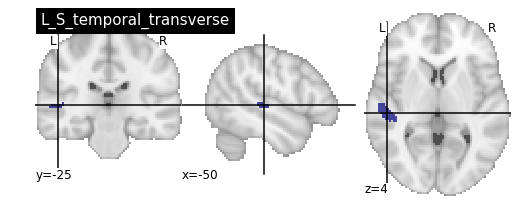

In [6]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_Lat_Fis_post) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_parieto_occipital) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_collat_transv_ant) &
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_Pole_temporal)
    )
)
res = q.do()
print("Looking for the Transverse Temporal Sulcus")

for r in res:
    if r.symbol_name not in Primary_sulci:
        assert len(res)==1
        Secondary_sulci.add(r.symbol_name)
        nl_ots = next(s for s in res)
        plotting.plot_roi(nl_ots.value.spatial_image(), title=nl_ots.symbol_name)

Looking for the Transverse Temporal Sulcus


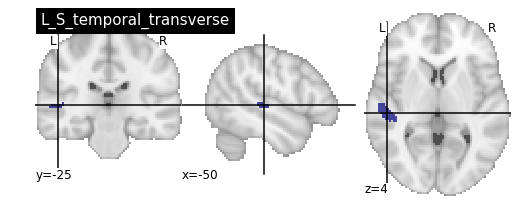

In [6]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_Lat_Fis_post) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_parieto_occipital) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_collat_transv_ant) &
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_Pole_temporal)
    )
)
res = q.do()
print("Looking for the Transverse Temporal Sulcus")

for r in res:
    if r.symbol_name not in Primary_sulci:
        assert len(res)==1
        Secondary_sulci.add(r.symbol_name)
        nl_ots = next(s for s in res)
        plotting.plot_roi(nl_ots.value.spatial_image(), title=nl_ots.symbol_name)

## Lateral Occipitotemporal sulcus

Looking for the Occipitotemporal Sulcus


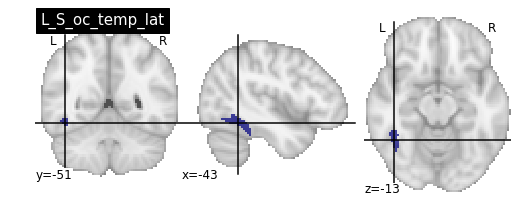

In [7]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_Lat_Fis_ant_Horizont) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_calcarine) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_Pole_temporal) &
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_Lat_Fis_ant_Horizont)
    )
)
res = q.do()
print("Looking for the Occipitotemporal Sulcus")

for r in res:
    if r.symbol_name not in Primary_sulci:
        assert len(res)==1
        Secondary_sulci.add(r.symbol_name)
        nl_ots = next(s for s in res)
        plotting.plot_roi(nl_ots.value.spatial_image(), title=nl_ots.symbol_name)

In [8]:
Secondary_sulci

{'L_S_oc_temp_lat', 'L_S_temporal_transverse'}

## Collateral sulcus: anterior part

Looking for the Collateral Sulcus (anterior part)


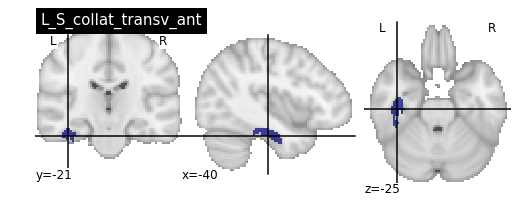

In [9]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_Pole_temporal) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_Lat_Fis_post) &
        nl.symbols.anatomical_inferior_of(x, nl.symbols.L_Lat_Fis_ant_Horizont)
    )
)
res = q.do()
print("Looking for the Collateral Sulcus (anterior part)")

for r in res:
    if r.symbol_name not in Primary_sulci:
        assert len(res)==1
        Secondary_sulci.add(r.symbol_name)
        nl_collat_ant = next(s for s in res)
        plotting.plot_roi(nl_collat_ant.value.spatial_image(), title=nl_collat_ant.symbol_name)

## Intermediate Primus of Jensen


Looking for the Intermediate Primus of Jensen


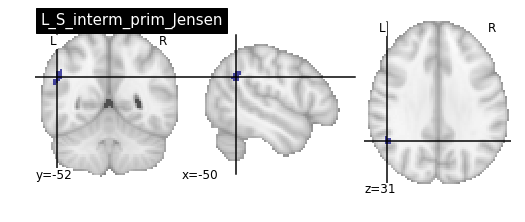

In [10]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_central) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_pericallosal) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_parieto_occipital)
    )
)
res = q.do()
print("Looking for the Intermediate Primus of Jensen")

for r in res:
    if r.symbol_name not in Primary_sulci:
        assert len(res)==1
        Secondary_sulci.add(r.symbol_name)
        nl_ipoj = next(s for s in res)
        plotting.plot_roi(nl_ipoj.value.spatial_image(), title=nl_ipoj.symbol_name)

## Subparietal sulcus

6 ways.

Looking for the Subparietal Sulcus


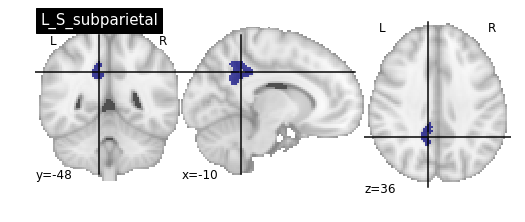

In [11]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_Lat_Fis_post) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_calcarine) &
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_central)
    )
)
res = q.do()
print("Looking for the Subparietal Sulcus")

for r in res:
    if r.symbol_name not in Primary_sulci:
        assert len(res)==1
        Secondary_sulci.add(r.symbol_name)
        nl_subparietal = next(s for s in res)
        plotting.plot_roi(nl_subparietal.value.spatial_image(), title=nl_subparietal.symbol_name)

Looking for the Subparietal Sulcus


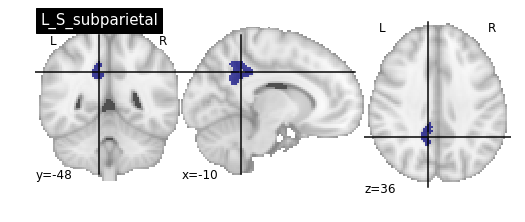

In [12]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_calcarine) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_calcarine) &
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_central)
    )
)
res = q.do()
print("Looking for the Subparietal Sulcus")

for r in res:
    if r.symbol_name not in Primary_sulci:
        assert len(res)==1
        Secondary_sulci.add(r.symbol_name)
        nl_subparietal = next(s for s in res)
        plotting.plot_roi(nl_subparietal.value.spatial_image(), title=nl_subparietal.symbol_name)

Looking for the Subparietal Sulcus


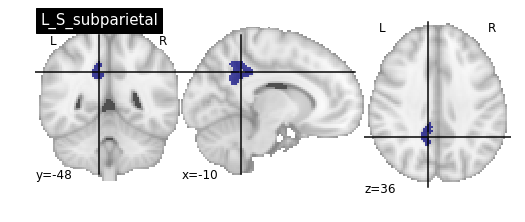

In [13]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_central) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_intrapariet_and_P_trans) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_Lat_Fis_post)
    )
)
res = q.do()
print("Looking for the Subparietal Sulcus")

for r in res:
    if r.symbol_name not in Primary_sulci:
        assert len(res)==1
        Secondary_sulci.add(r.symbol_name)
        nl_subparietal = next(s for s in res)
        plotting.plot_roi(nl_subparietal.value.spatial_image(), title=nl_subparietal.symbol_name)

Looking for the Subparietal Sulcus


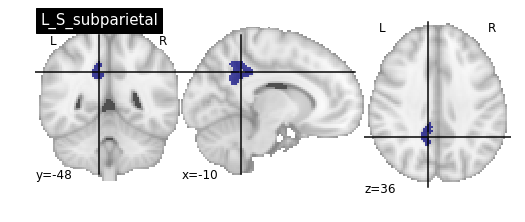

In [14]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_central) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_intrapariet_and_P_trans) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_Lat_Fis_ant_Horizont)
    )
)
res = q.do()
print("Looking for the Subparietal Sulcus")

for r in res:
    if r.symbol_name not in Primary_sulci:
        assert len(res)==1
        Secondary_sulci.add(r.symbol_name)
        nl_subparietal = next(s for s in res)
        plotting.plot_roi(nl_subparietal.value.spatial_image(), title=nl_subparietal.symbol_name)

Looking for the Subparietal Sulcus


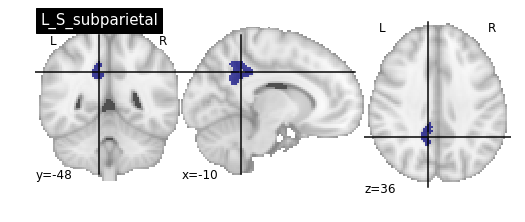

In [15]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_temporal_sup) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_calcarine) &
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_central)
    )
)
res = q.do()
print("Looking for the Subparietal Sulcus")

for r in res:
    if r.symbol_name not in Primary_sulci:
        assert len(res)==1
        Secondary_sulci.add(r.symbol_name)
        nl_subparietal = next(s for s in res)
        plotting.plot_roi(nl_subparietal.value.spatial_image(), title=nl_subparietal.symbol_name)

Looking for the Subparietal Sulcus


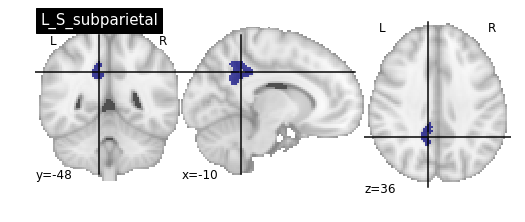

In [16]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_postcentral) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_interm_prim_Jensen)
    )
)
res = q.do()
print("Looking for the Subparietal Sulcus")

for r in res:
    if r.symbol_name not in Primary_sulci:
        assert len(res)==1
        Secondary_sulci.add(r.symbol_name)
        nl_subparietal = next(s for s in res)
        plotting.plot_roi(nl_subparietal.value.spatial_image(), title=nl_subparietal.symbol_name)

## Looking for precentral superior and inferior parts

Looking for the Precentral Sulci: superior and inferior parts


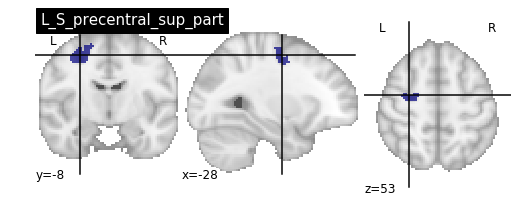

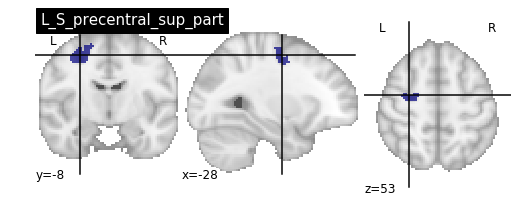

In [17]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_Lat_Fis_ant_Horizont) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_Lat_Fis_post) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_pericallosal)
    )
)
res = q.do()
print("Looking for the Precentral Sulci: superior and inferior parts")

for r in res:
    if r.symbol_name not in Primary_sulci:
        assert len(res)==2
        Secondary_sulci.add(r.symbol_name)
        nl_precentral_sulci = next(s for s in res)
        plotting.plot_roi(nl_precentral_sulci.value.spatial_image(), title=nl_precentral_sulci.symbol_name)

In [18]:
Secondary_sulci

{'L_S_collat_transv_ant',
 'L_S_interm_prim_Jensen',
 'L_S_oc_temp_lat',
 'L_S_precentral_inf_part',
 'L_S_precentral_sup_part',
 'L_S_subparietal',
 'L_S_temporal_transverse'}

# Tertiary sulci

In [19]:
Tertiary_sulci=set()

## Occipital superior and transversal sulci

Looking for the Superior Occipital and Transversal sulci


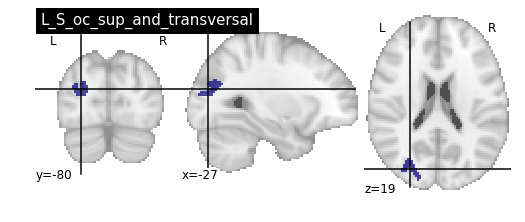

In [30]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_Lat_Fis_post) &
        nl.symbols.anatomical_inferior_of(x, nl_subparietal) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_calcarine)
    )
)
res = q.do()
print("Looking for the Superior Occipital and Transversal sulci")

for r in res:
    if r.symbol_name not in Primary_sulci and r.symbol_name not in Secondary_sulci:
        assert len(res)==1
        Tertiary_sulci.add(r.symbol_name)
        nl_occ_sup_trans = next(s for s in res)
        plotting.plot_roi(nl_occ_sup_trans.value.spatial_image(), title=nl_occ_sup_trans.symbol_name)

## Intraparietal sulcus

Looking for the Intraparietal Sulcus
['L_S_intrapariet_and_P_trans']
L_S_intrapariet_and_P_trans


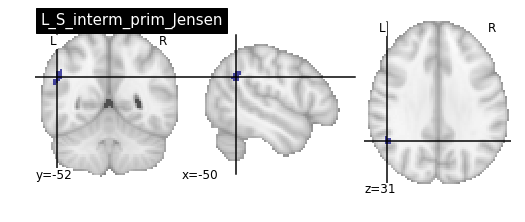

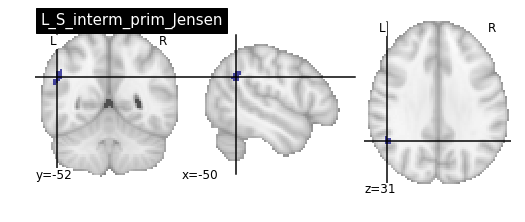

In [21]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_pericallosal) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_calcarine) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_Pole_occipital)
    )
)
res = q.do()
all_sulci_found = []
print("Looking for the Intraparietal Sulcus")

for r in res:
    all_sulci_found.append(r.symbol_name)
for sulcus in all_sulci_found:
    if sulcus in Primary_sulci or sulcus in Secondary_sulci:
        all_sulci_found.remove(sulcus)
        print(all_sulci_found)
        assert len(all_sulci_found)==1
        nl_ips = next(s for s in res)
        plotting.plot_roi(nl_ips.value.spatial_image(), title=nl_ips.symbol_name)
        for lone_sulcus in all_sulci_found:
            nl_ips = next(s for s in res)
            plotting.plot_roi(nl_ips.value.spatial_image(), title=nl_ips.symbol_name)
            print(lone_sulcus)
            Tertiary_sulci.add(lone_sulcus)

Looking for the Intraparietal Sulcus


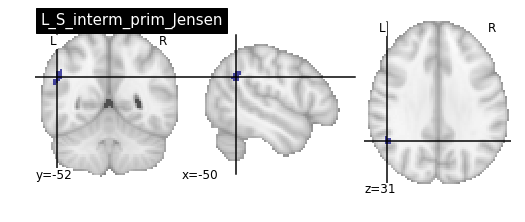

In [22]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl.symbols.L_S_pericallosal) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_S_calcarine) &
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_Pole_occipital)
    )
)
res = q.do()
all_sulci_found = []
print("Looking for the Intraparietal Sulcus")

for r in res:
    all_sulci_found.append(r.symbol_name)
for sulcus in all_sulci_found:
    if len(all_sulci_found)==1:
        Tertiary_sulci.add(sulcus)
        nl_ips = next(s for s in res)
        plotting.plot_roi(nl_ips.value.spatial_image(), title=nl_ips.symbol_name)
    elif sulcus in Primary_sulci or sulcus in Secondary_sulci:
        all_sulci_found.remove(sulcus)
        assert len(all_sulci_found)==1
#         nl_ips = next(s for s in res)
#         plotting.plot_roi(nl_ips.value.spatial_image(), title=nl_ips.symbol_name)
        for lone_sulcus in all_sulci_found:
            nl_ips = next(s for s in res)
            plotting.plot_roi(nl_ips.value.spatial_image(), title=nl_ips.symbol_name)
            Tertiary_sulci.add(lone_sulcus)

In [23]:
Tertiary_sulci

{'L_S_intrapariet_and_P_trans', 'L_S_oc_sup_and_transversal'}

## Superior frontal sulcus

Looking for the Superior Frontal Sulcus
Found


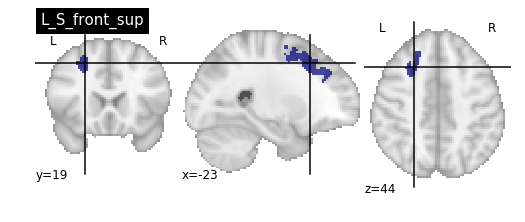

In [24]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_anterior_of(x, nl.symbols.L_S_central) &
        nl.symbols.anatomical_superior_of(x, nl_ipoj)
    )
)
res = q.do()
all_sulci_found = []
print("Looking for the Superior Frontal Sulcus")

for r in res:
    all_sulci_found.append(r.symbol_name)
for sulcus in all_sulci_found:
    if len(all_sulci_found)==1:
        print("Found")
        Tertiary_sulci.add(sulcus)
        nl_sfs = next(s for s in res)
        plotting.plot_roi(nl_sfs.value.spatial_image(), title=nl_sfs.symbol_name)
    elif sulcus in Primary_sulci or sulcus in Secondary_sulci:
        all_sulci_found.remove(sulcus)
        assert len(all_sulci_found)==1
        print("Found")
        nl_sfs = next(s for s in res)
        plotting.plot_roi(nl_sfs.value.spatial_image(), title=nl_sfs.symbol_name)
        for lone_sulcus in all_sulci_found:
            Tertiary_sulci.add(lone_sulcus)

In [25]:
Tertiary_sulci

{'L_S_front_sup', 'L_S_intrapariet_and_P_trans', 'L_S_oc_sup_and_transversal'}

## Postcentral sulcus 

Looking for the Postcentral Sulcus
Found


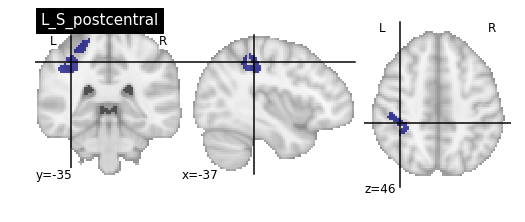

In [26]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_posterior_of(x, nl_precentral_sulci) &
        nl.symbols.anatomical_superior_of(x, nl_subparietal) 
    )
)
res = q.do()
print("Looking for the Postcentral Sulcus")
all_sulci_found = []

for r in res:
    all_sulci_found.append(r.symbol_name)
for sulcus in all_sulci_found:
    if len(all_sulci_found)==1:
        print("Found")
        Tertiary_sulci.add(sulcus)
        nl_pocs = next(s for s in res)
        plotting.plot_roi(nl_pocs.value.spatial_image(), title=nl_pocs.symbol_name)
    elif sulcus in Primary_sulci or sulcus in Secondary_sulci:
        all_sulci_found.remove(sulcus)
        assert len(all_sulci_found)==1
        print("Found")
        nl_pocs = next(s for s in res)
        plotting.plot_roi(nl_pocs.value.spatial_image(), title=nl_pocs.symbol_name)
        for lone_sulcus in all_sulci_found:
            Tertiary_sulci.add(lone_sulcus)

In [27]:
Tertiary_sulci

{'L_S_front_sup',
 'L_S_intrapariet_and_P_trans',
 'L_S_oc_sup_and_transversal',
 'L_S_postcentral'}

## Middle frontal sulcus

Looking for the Middle Frontal Sulcus
Found


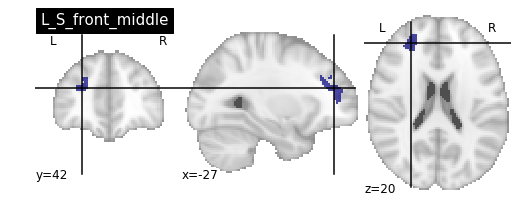

In [28]:
x = nl.new_region_symbol('x')
q = nl.query(
    x, 
    (
        nl.symbols.anatomical_anterior_of(x, nl_precentral_sulci) &
        nl.symbols.anatomical_superior_of(x, nl.symbols.L_Lat_Fis_ant_Vertical) &
        nl.symbols.anatomical_inferior_of(x, nl_precentral_sulci)
    )
)
res = q.do()
print("Looking for the Middle Frontal Sulcus")
all_sulci_found = []

for r in res:
    all_sulci_found.append(r.symbol_name)
for sulcus in all_sulci_found:
    if len(all_sulci_found)==1:
        print("Found")
        Tertiary_sulci.add(sulcus)
        nl_mfs = next(s for s in res)
        plotting.plot_roi(nl_mfs.value.spatial_image(), title=nl_mfs.symbol_name)
    elif sulcus in Primary_sulci or sulcus in Secondary_sulci:
        all_sulci_found.remove(sulcus)
        assert len(all_sulci_found)==1
        print("Found")
        nl_mfs = next(s for s in res)
        plotting.plot_roi(nl_mfs.value.spatial_image(), title=nl_mfs.symbol_name)
        for lone_sulcus in all_sulci_found:
            Tertiary_sulci.add(lone_sulcus)

In [29]:
Tertiary_sulci

{'L_S_front_middle',
 'L_S_front_sup',
 'L_S_intrapariet_and_P_trans',
 'L_S_oc_sup_and_transversal',
 'L_S_postcentral'}